In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import requests
import numpy as np
import time
import matplotlib.pyplot as plt

### Variables

In [3]:
endpoints = {}
endpoints['inventor'] = 'http://www.patentsview.org/api/v5/inventors/'
endpoints['assignee'] = 'http://www.patentsview.org/api/assignees/'
endpoints['patents'] = 'http://www.patentsview.org/api/patents/'

nordicCountries = {'Denmark':'DK',
                   'Iceland':'IS',
                   'Finland':'FI',
                   'Sweden':'SE',
                   'Norway':'NO'}

population = {'Denmark':5_809_502,
              'Iceland':343_518,
              'Finland':5_537_364,
              'Sweden':10_255_102,
              'Norway':5_372_191}

### Hjálparföll

In [4]:
inventor_num = {} 
for name in nordicCountries:
    #Get the number of assignees
    inventors_tmp = []
    query = 'query?q={"assignee_country":"%s"}&o={"per_page":1}'%(nordicCountries[name])
    print(query)
    request = requests.get(endpoints['inventor']+query)
    request_json  = request.json()
    n_assignees = request_json['total_inventor_count']
    inventor_num[name] = n_assignees


query?q={"assignee_country":"DK"}&o={"per_page":1}
query?q={"assignee_country":"IS"}&o={"per_page":1}
query?q={"assignee_country":"FI"}&o={"per_page":1}
query?q={"assignee_country":"SE"}&o={"per_page":1}
query?q={"assignee_country":"NO"}&o={"per_page":1}


In [5]:
assignee_num = {} 
for name in nordicCountries:
    #Get the number of assignees
    inventors_tmp = []
    query = 'query?q={"assignee_lastknown_country":"%s"}&o={"per_page":1}'%(nordicCountries[name])
#     print(query)
    request = requests.get(endpoints['assignee']+query)
    request_json  = request.json()
#     print(request_json)
    n_assignees = request_json['total_assignee_count']
    assignee_num[name] = n_assignees


In [6]:
patent_num = {} 
for name in nordicCountries:
    #Get the number of assignees
    inventors_tmp = []
    query = 'query?q={"assignee_country":"%s"}&o={"per_page":1}'%(nordicCountries[name])
    print(query)
    request = requests.get(endpoints['patents']+query)
    request_json  = request.json()
    print(request_json)
    n_assignees = request_json['total_patent_count']
    patent_num[name] = n_assignees

    
    

query?q={"assignee_country":"DK"}&o={"per_page":1}
{'patents': [{'patent_id': '10000332', 'patent_number': '10000332', 'patent_title': 'Display and distribution package for eggs'}], 'count': 1, 'total_patent_count': 18071}
query?q={"assignee_country":"IS"}&o={"per_page":1}
{'patents': [{'patent_id': '10010434', 'patent_number': '10010434', 'patent_title': 'Prosthetic and orthotic devices having magnetorheological elastomer spring with controllable stiffness'}], 'count': 1, 'total_patent_count': 708}
query?q={"assignee_country":"FI"}&o={"per_page":1}
{'patents': [{'patent_id': '10000408', 'patent_number': '10000408', 'patent_title': 'Method for heating glass sheet, and glass tempering furnace'}], 'count': 1, 'total_patent_count': 29881}
query?q={"assignee_country":"SE"}&o={"per_page":1}
{'patents': [{'patent_id': '10000170', 'patent_number': '10000170', 'patent_title': 'Bumper beam with embossed cover'}], 'count': 1, 'total_patent_count': 57783}
query?q={"assignee_country":"NO"}&o={"per

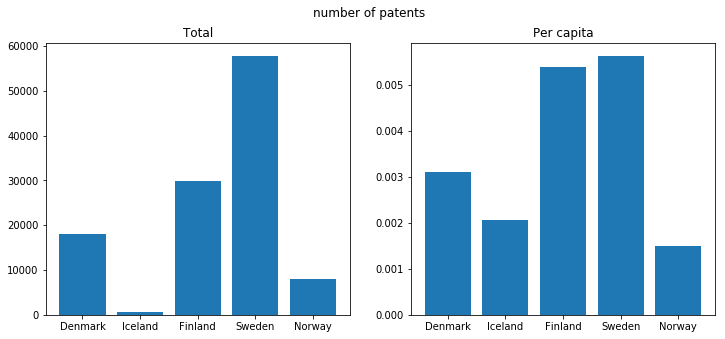

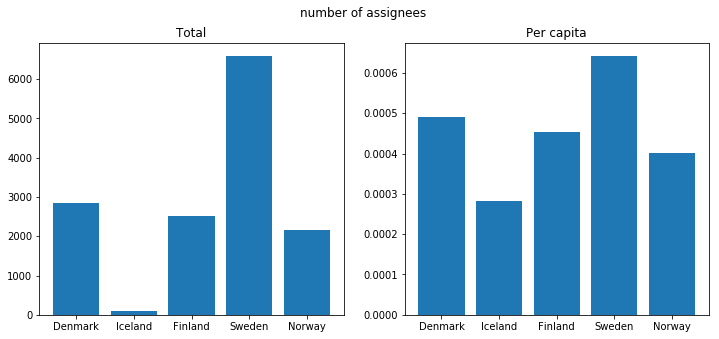

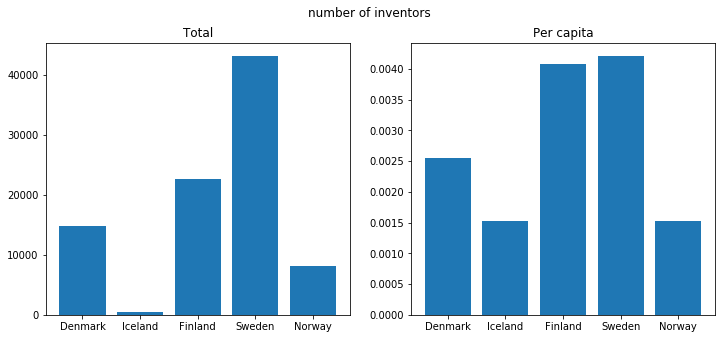

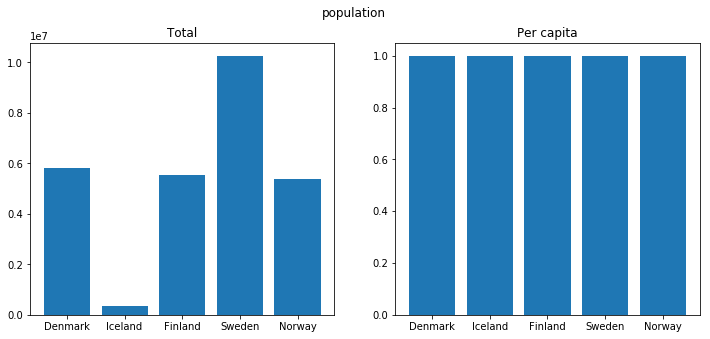

In [7]:
info = pd.DataFrame(patent_num,index=['number of patents']).T
info['number of assignees'] = assignee_num.values()
info['number of inventors'] = inventor_num.values()
info['population'] = population.values()

# info
for col in info:
    f,ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].bar(info.index,info[col])
    ax[0].set_title('Total')
    ax[1].bar(info.index,info[col]/info.population)
    ax[1].set_title('Per capita')
    f.suptitle(col)
    plt.show()

In [8]:

# Fyrir smærra gagnasett 
nordicCountries = {'Iceland':'IS'}
n_assignees_at_once = 1000

df_assignees = pd.DataFrame()
inventors = {}
for name in nordicCountries:
    #Get the number of assignees
    inventors_tmp = []
    query = 'query?q={"assignee_country":"%s"}&o={"per_page":1}'%(nordicCountries[name])
    print(query)
    request = requests.get(endpoints['inventor']+query)
    request_json  = request.json()
    n_assignees = request_json['total_inventor_count']
    print('Total assignees in country:',n_assignees)
    for page in np.arange(0,n_assignees,n_assignees_at_once):
            q_name = nordicCountries[name]
            q_page = int(page//n_assignees_at_once+1)
            q_perp = n_assignees_at_once
            query_q = 'q={"assignee_country":"%s"}'%(q_name)
            query_f = '&f=["patent_number","patent_title","inventor_key_id","inventor_id","inventor_first_name","inventor_last_name","assignee_id","assignee_organization"]'
            query_o = '&o={"per_page":%s,"page":%s}'%(q_perp,q_page)
            query = 'query?'+query_q+query_f+query_o
            print(query)
            request = requests.get(endpoints['inventor']+query)
            request_json  = request.json()
            inventors_tmp.append(request_json) 
    inventors[name] = inventors_tmp

query?q={"assignee_country":"IS"}&o={"per_page":1}
Total assignees in country: 523
query?q={"assignee_country":"IS"}&f=["patent_number","patent_title","inventor_key_id","inventor_id","inventor_first_name","inventor_last_name","assignee_id","assignee_organization"]&o={"per_page":1000,"page":1}


In [9]:
inventors['Iceland']

[{'inventors': [{'inventor_key_id': '1072',
    'inventor_id': '10000438-1',
    'inventor_first_name': 'Michael David',
    'inventor_last_name': 'Krohn',
    'patents': [{'patent_number': '10000438',
      'patent_title': 'Small molecule inhibitors of TRPA1',
      'patent_id': '10000438'},
     {'patent_number': '7576102',
      'patent_title': 'Biaryl substituted nitrogen containing heterocycle inhibitors of LTA4H for treating inflammation',
      'patent_id': '7576102'},
     {'patent_number': '8067235',
      'patent_title': 'Optimized human T1R2 nucleic acid molecule',
      'patent_id': '8067235'},
     {'patent_number': '8067236',
      'patent_title': 'Optimized human T1R3 nucleic acid molecule',
      'patent_id': '8067236'},
     {'patent_number': '8623340',
      'patent_title': 'Omega-cyclohexylalkan-1-oles and use thereof as antimicrobial actives to combat body odor',
      'patent_id': '8623340'},
     {'patent_number': '8623810',
      'patent_title': 'Protease for wou

In [10]:
# Skilar lista af inventors með meðfylgjandi upplýsingum og landi sem þeir eru frá
def extractInventors(inventors):
    inventor_dict = {}
    for country in inventors:    
        n_inventors = inventors[country][0]['total_inventor_count']
        print('Number of inventors:',n_inventors)
        for fold in inventors[country]:
    #         print([x for x in fold['inventors']])
            for inventor in fold['inventors']:
                inventor['country'] = country
                inventor_dict[inventor['inventor_key_id']] = inventor
    return inventor_dict
inventor_dict = extractInventors(inventors)


Number of inventors: 523


In [11]:
df_inventors = pd.DataFrame(inventor_dict).T
# df_inventors = df_inventors.drop(['assignees','patents'],axis=1)
df_inventors.to_csv('../../Data/inventor_names.csv')

In [12]:

df_inventors_assignees = pd.DataFrame(inventor_dict).T
# df_inventors_assignees = df_inventors_assignees.drop(['assignees','patents'],axis=1)
# df_inventors_assignees.to_csv('../../Data/inventor_names.csv')

In [13]:
# Skila öllum assignee ID sem gefinn inventor er tengdur við
def assignee_list(assignees):
    assignees_df = pd.DataFrame(assignees)
    return assignees_df.assignee_key_id.values
# Listi af öllum inventors og meðfylgjandi assignee sem þeir eru tengdir
adjacency_lists = {}
for inventor in inventor_dict:
    print(inventor_dict[inventor]['inventor_id'], inventor_dict[inventor]['inventor_first_name'], inventor_dict[inventor]['inventor_last_name'])
    adjacency_lists[inventor] = assignee_list(inventor_dict[inventor]['assignees'])

10000438-1 Michael David Krohn
10001214-1 Lei Zhao
10010434-1 Freygardur Thorsteinsson
10010434-2 Ivar Gudmundsson
10010434-3 Christophe Guy Lecomte
10010575-3 Sunil Vandse
10015242-3 Jason Lee
10028654-3 Michael A. Campos
10028845-1 Hafsteinn Jonasson
10028845-2 Hallgrimur Skuli Hafsteinsson
10028845-3 Egill Sveinbjorn Egilsson
10028845-4 Dana Stewart Marlin
10028845-5 Marco Steinberg
10029282-1 Egill Thor Ragnarsson
10034781-1 Hsin-Fa Shen
10034782-1 David Sandahl
10039664-1 Tracy E. Grim
10039907-2 Eran Hirszowicz
10051923-1 Bjorn Thor Omarsson
10051923-2 Arni Thor Ingimundarson
10051923-3 Thorhalla Austman Hardardottir
10051923-4 Helgi Jonsson
10052221-1 Halldor Albertsson
10052221-3 Helga Run Palsdottir
10052333-1 Sveinbjorn Gizurarson
10058143-1 Jonathan Walborn
10058143-2 Harry Duane Romo
10058143-3 Adam A. Dunn
10058535-1 Vincent P. Sandanayaka
10059723-4 Jasbir Singh
10064749-1 Irving Hu
10064749-2 Jane Lee
10064781-1 ArinbjÃ¶rn Viggo Clausen
10064781-2 Aron Kristbjorn Alberts

7727174-1 Julia Chang
7728032-2 Pushpa Chandrasekar
7766871-2 Hila Yaron
7774036-1 Gisli Hreinn Halldorsson
7774036-3 Jon Atli Benediktsson
7774036-4 Robert Arnar Karlsson
7774036-5 Sveinn Hakon Hardarson
7774036-6 Thor Eysteinsson
7811333-1 Helgi Jnsson
7811333-3 Heirn Ggja Ragnarsdttir
7834161-2 Bjrn Lrus rvar
7850965-1 Allan Bardow Jensen
7851486-4 Hkon Hkonarson
7855310-4 Jean Krutmann
7889197-1 Adam Kraver
7893040-2 Einar Stefnsson
7897561-2 Gudmundur Johann Arason
7947699-1 Mayur Devjibhai Khunt
7947699-3 Haushabhau Shivaji Pagire
7947699-4 Nitin Sharadchandra Pradhan
7959589-2 Brice Robertson
7967149-1 Hjlmarsson Helgi
7981068-1 Thora Thorgilsdottir
7985193-11 M. Ijzerman
7985193-4 Juan Moreno Sastoque
7985193-5 Fernando Brunetti Fernndez
7985193-6 Antonio Cullel Mirada
7985193-7 Jos Bertomeu
7985741-1 Johannes Gislason
7985741-2 Martin Peter
7985741-3 Jon M. Einarsson
7985741-4 Sven Bahrke
7989480-3 David Sullins
8007544-1 Orn Ingvi Jonsson
8034120-3 Jenny Ruth Hrafnsdottir
803

In [14]:
# Allir einstaklingar og fyrirtæki og allar tengingar þeirra við önnur fyrirtæki/einstaklinga
nodes = {}
#Remove None values from list
for item in adjacency_lists:
    nodes[item] = [x for x in adjacency_lists[item] if x]
for item in adjacency_lists:
    for assignee in adjacency_lists[item]:
        if assignee != None:
            if assignee not in nodes.keys():
                nodes[assignee] = [item]
            else:
                if item not in nodes[assignee]:
                    nodes[assignee].append(item)


In [15]:
#Búa til adjecency matrix úr nóðu listanum
g = nodes
keys=sorted(g.keys())
size=len(keys)

M = [ [0]*size for i in range(size) ]

for a,b in [(keys.index(a), keys.index(b)) for a, row in g.items() for b in row]:
     M[a][b] = 2 if (a==b) else 1

In [16]:
from sklearn.cluster import spectral_clustering
Matrix = np.array(M)
clustering = spectral_clustering(Matrix)

C:\Users\Sverrir\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


C:\Users\Sverrir\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


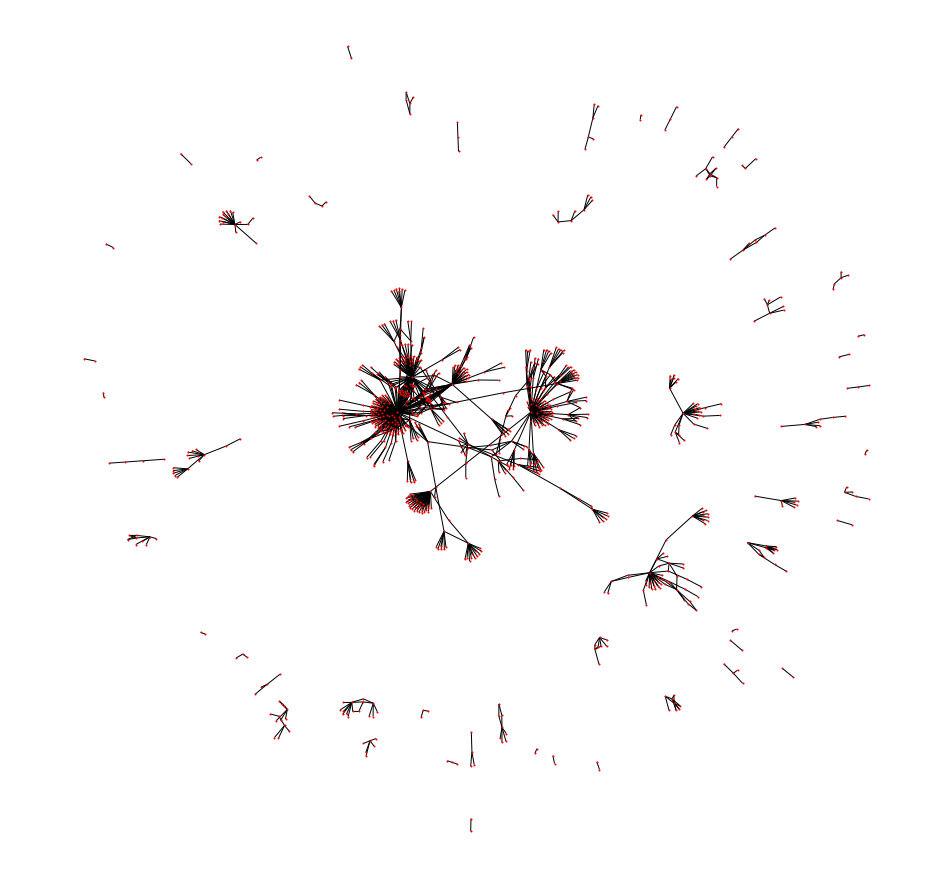

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    plt.figure(figsize=(12,12))
    nx.draw(gr, node_size=1, labels=mylabels, with_labels=False)
    plt.show()
    return gr
    
labels = np.array([x for x in nodes.keys()])
G=show_graph_with_labels(Matrix, labels)
plt.show()

In [18]:
edge_list = []
for inventor in adjacency_lists:
    for assignee in adjacency_lists[inventor]:
        edge_list.append((inventor,assignee))

In [19]:
from networkx.algorithms import bipartite
unique_assignees = [x for x in nodes.keys() if '-' not in x]
A1=['a','b','c']
A2=['1','2','3']
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(A1, bipartite=0)
B.add_nodes_from(A2, bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([('a','1'),('b','2'),('c','3'),('c','1')])

print(B.edges(data=True))

[('a', '1', {}), ('b', '2', {}), ('c', '3', {}), ('c', '1', {})]


{'a': Text(0, 0.25, 'a'),
 'b': Text(0, 1.25, 'b'),
 'c': Text(0, 2.25, 'c'),
 '1': Text(1, 0.25, '1'),
 '2': Text(1, 1.25, '2'),
 '3': Text(1, 2.25, '3')}

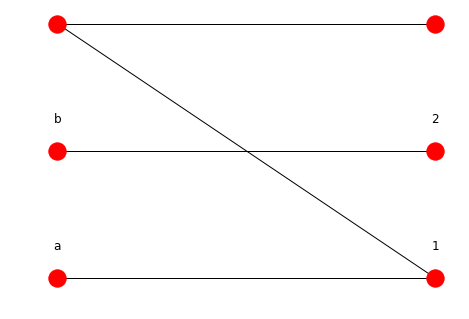

In [20]:
pos = {node:[0, i] for i,node in enumerate(A1)}
pos.update({node:[1, i] for i,node in enumerate(A2)})
nx.draw(B, pos, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25
nx.draw_networkx_labels(B, pos)

In [21]:
import csv

w = csv.writer(open("../../Data/InventorAssigneeLinks.csv", "w"))
for key, val in adjacency_lists.items():
    w.writerow([key, val])

In [22]:
nodes

{'1072': ['215186', '267726', '452718', '280607', '437655'],
 '3580': ['364330',
  '232790',
  '57051',
  '76075',
  '87361',
  '337803',
  '22904',
  '7631',
  '145703',
  '123579',
  '113860',
  '429672',
  '344251',
  '439874',
  '267726',
  '456750',
  '288668',
  '49511',
  '45966',
  '150040',
  '291313',
  '363218',
  '254337',
  '387608',
  '28379',
  '209078',
  '168391',
  '216186',
  '445804',
  '450597',
  '257460',
  '412063',
  '290454',
  '317772',
  '270165',
  '146322',
  '504702'],
 '27925': ['376597', '396489', '232062'],
 '27926': ['376597', '232062'],
 '27927': ['376597', '232062', '106412', '396489'],
 '28327': ['282874', '166724'],
 '40131': ['277558',
  '169956',
  '149376',
  '37851',
  '168904',
  '127127',
  '51749',
  '22119',
  '313535',
  '414475',
  '230442',
  '96610',
  '49511'],
 '71191': ['260587', '68557', '301965', '396489', '151004', '199973'],
 '71632': ['200261', '396489'],
 '71633': ['200261'],
 '71634': ['200261', '396489', '232062'],
 '71635':

In [23]:

A1 = [x for x in nodes.keys() if '-' not in x]
A2 = [x for x in adjacency_lists.keys()]
edges = []
for x in A1:
    for y in nodes[x]:
        edges.append((x,y))
print(A1[:10])
print(A2[:10])

['1072', '3580', '27925', '27926', '27927', '28327', '40131', '71191', '71632', '71633']
['1072', '3580', '27925', '27926', '27927', '28327', '40131', '71191', '71632', '71633']


In [24]:
from networkx.algorithms import bipartite
unique_assignees = [x for x in nodes.keys() if '-' not in x]

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(adjacency_lists.keys(), bipartite=0)
B.add_nodes_from(unique_assignees, bipartite=1)
# Add edges only between nodes of opposite node sets

B.add_edges_from(edges)


In [25]:
pd.DataFrame(edges).to_csv('../../Data/InventorAssigneeLinks.csv')


In [26]:
# edges

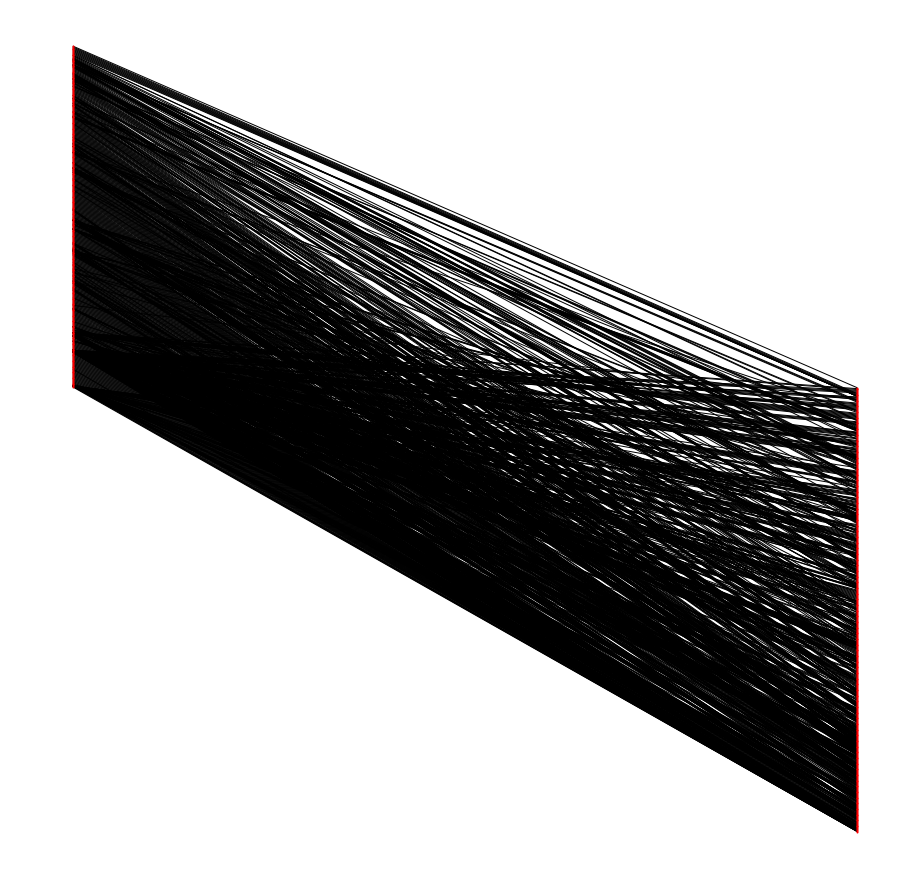

In [27]:
pos = {node:[0, i] for i,node in enumerate(A1)}
pos.update({node:[1, i] for i,node in enumerate(A2)})
plt.figure(figsize=(12,12))
nx.draw(B, pos,node_size=1, with_labels=False)
for p in pos:  # raise text positions
    pos[p][1] += 0.25

# nx.draw_networkx_labels(B, pos)
plt.show()

In [28]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

In [29]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.node[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [30]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [31]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [32]:
variable_list = ["assignee_id",
"assignee_key_id",
# "assignee_type",
# "cpc_category",
"assignee_first_name",
"assignee_last_name",
"assignee_organization",
"assignee_total_num_inventors",
"assignee_total_num_patents",
# "app_country",
# "app_date",
# "app_number",
# "app_type",
# "cpc_category",
# "cpc_group_id",
# "cpc_group_title",
# "forprior_country",
# "forprior_date",
# "inventor_country",
"inventor_id",
"inventor_first_name",
"inventor_last_name",
# "inventor_latitude",
# "inventor_longitude",
# "inventor_state",
# "inventor_total_num_patents",
# "ipc_action_date",	
# "ipc_class",
# "ipc_subclass",
# "ipc_classification_value",
"location_city",
"location_country",
"location_county",
"location_id",
"location_latitude",
"location_longitude",
"nber_category_id",
"nber_category_title",
"nber_subcategory_id",
"nber_subcategory_title"]
# "patent_date",
# "patent_kind",
# "patent_type",
# "patent_number",
# "patent_title"]

In [33]:
'''
Fall sem tekur inn query og reyni að framkvæma það (attempts) oft
svo ef tiltekið query fær ekki svar innan (timeout) sekúndna, 
þá bíður það í (wait) sekúndur og reynir aftur. 
'''
def try_fetch(query,timeout,attempts,wait,unlimited=False):
    completed = False
    tries = 0
    while not completed:
        print('attempt number:%s'%(tries+1))
        if (tries >= attempts-1) and not unlimited:
            return {}
        else:
            try:
                request = requests.get(timeout=np.max([timeout,300 if unlimited else 0]),url=query)
                request_json  = request.json()
                completed =True
            except requests.exceptions.Timeout as tmt:
                print(tmt)
                time.sleep(wait)
                tries +=1
    return request_json

In [35]:
API_url = 'http://www.patentsview.org/api/assignees/'
nordicCountries = {'Denmark':'DK',
                   'Iceland':'IS',
                   'Finland':'FI',
                   'Sweden':'SE',
                   'Norway':'NO'}
# Fyrir smærra gagnasett 
nordicCountries = {'Iceland':'IS'}
n_assignees_at_once = 200

df_assignees = pd.DataFrame()
assignees = {}
for name in nordicCountries:
    #Get the number of assignees
    assignees_tmp = []
    query = 'query?q={"assignee_lastknown_country":"%s"}&o={"per_page":1}'%(nordicCountries[name])
    print(query)
    request_json = try_fetch(API_url+query,10,5,2)
    n_assignees = request_json['total_assignee_count']
    print('Total assignees in country:',n_assignees)
    for page in np.arange(0,n_assignees,n_assignees_at_once):
            q_name = nordicCountries[name]
            q_page = int(page//n_assignees_at_once+1)
            q_perp = n_assignees_at_once
            query_q = 'q={"assignee_lastknown_country":"%s"}'%(q_name)
            query_f = '&f=%s'%(str(variable_list).replace('\'','\"'))
            query_o = '&o={"per_page":%s,"page":%s}'%(q_perp,q_page)
            query = 'query?'+query_q+query_f+query_o
            print(query)
            
            # Try except loop sem reynir 10 sinnum að sækja gögnin
            request_json = try_fetch(API_url+query,20,10,5,True)
            assignees_tmp.append(request_json) 
    assignees[name] = assignees_tmp

query?q={"assignee_lastknown_country":"IS"}&o={"per_page":1}
attempt number:1
Total assignees in country: 97
query?q={"assignee_lastknown_country":"IS"}&f=["assignee_id", "assignee_key_id", "assignee_first_name", "assignee_last_name", "assignee_organization", "assignee_total_num_inventors", "assignee_total_num_patents", "inventor_id", "inventor_first_name", "inventor_last_name", "location_city", "location_country", "location_county", "location_id", "location_latitude", "location_longitude", "nber_category_id", "nber_category_title", "nber_subcategory_id", "nber_subcategory_title"]&o={"per_page":200,"page":1}
attempt number:1


In [37]:
print('Done!')

Done!


In [38]:
# assignees

In [39]:
patentList = {}
def addToPatentList(assignee_id,patents):
    patentList[assignee_id] = patents
    
def processAssignee(assignee):
#     [print(str(type(assignee[x]))+'\n\t'+x+'\n\t\t'+str(assignee[x])) for x in assignee]
    single_variables = [x for x in assignee if type(assignee[x]) == type(' ')]
    tmp_dict = {}
    
    # Setja í dálk allar breytur með eitt gildi
    for var in single_variables:
        tmp_dict[var] = assignee[var]
        
    # Setja í dálk allar breytur um staðsetningu með eitt gildi
    if 'locations' in assignee:
        location_variables = [x for x in assignee['locations'][0] if type(assignee['locations'][0][x]) == type(' ')]
        for var in location_variables:
            tmp_dict[var] = assignee['locations'][0][var]

    # Bæta lista af patents í annað dict til að vinna með seinna
    if 'patents' in assignee:
        addToPatentList(assignee['assignee_id'],assignee['patents'])
        
    return tmp_dict

# Búa til assignee database 
assignee_df=[]
for country in assignees:
    country_df = assignees[country]
    for fold in country_df:
        for assignee in fold['assignees']:
            tmp_assign = processAssignee(assignee)

            assignee_df.append(tmp_assign)

#Búa til dataframe og setja viðeigandi gagnatýpur
loc_df = pd.DataFrame(assignee_df)
loc_df.location_longitude = loc_df.location_longitude.astype(float)
loc_df.location_latitude = loc_df.location_latitude.astype(float)
loc_df.assignee_total_num_inventors = loc_df.assignee_total_num_inventors.astype(int)
loc_df.assignee_total_num_patents = loc_df.assignee_total_num_patents.astype(int)

In [40]:
loc_df.assignee_total_num_patents.astype(float).sum()

723.0

In [55]:
loc_df.sort_values('assignee_total_num_patents',ascending=False)

assignee_first_name               assignee_id assignee_key_id  \
6                  NaN  org_36XOp10ZUFEeAaC5tMGH           26949   
23                 NaN  org_ASERyuqDgGkPmRFfVvju           85047   
58                 NaN  org_oDcHTNwNRof1kPCTSFPn          271302   
28                 NaN  org_Cikjm1J1WxBxBhs5cNUp          108412   
56                 NaN  org_nu7vuTaygxFBSFwN18Fc          265069   
22                 NaN  org_AERZh2MwJz43lh0rQkfa           79034   
40                 NaN  org_fqkEfeLJ6mfYELFR3BkL          153588   
1                  NaN  org_0LzwWua1ah5ocjHw7dAF            9166   
63                 NaN  org_Pqj6Fch4YbUCCtdbo1z7          290951   
75                 NaN  org_uUOs6JmTxwxJ2bQV2kBe          362072   
29                 NaN  org_cPDdFg7M0b03BNWMsTNI          111452   
53                 NaN  org_N5CdabEC1FjRaAl1d6y9          255030   
70                 NaN  org_Sa73TEp23FO0A0RYyok8          325184   
21                 NaN  org_AcBk8wAeQzLAms8nKzFN           77912   
19                 NaN  org_9nQx0yKDKPtqQ4q2Z27T           71962   
57                 NaN  org_ny6jH8C7o3v7iMvV8Z57          266769   
15                 NaN  org_8ThNEvLzrKiw6JBGvyml           66219   
5                  NaN  org_2oQMP1eKkIjdPGwGeTv7           23654   
47                 NaN  org_jHaSvacRgUK6QE6565MN          204320   
42                 NaN  org_g1yY2dvl9g6ReWmnyPD7          158150   
27                 NaN  org_bwWIQya6jIClTd71AdaO          100921   
50                 NaN  org_lRdsNXemuYpNd2Rrj6lP          236255   
34                 NaN  org_ENO6ZXxuQCeCAC62ICgP          138568   
35                 NaN  org_euD7Kv7kPHogboD3iZ0W          141540   
36                 NaN  org_F014nn4CXJuSvIolXfKt          144037   
0                  NaN  org_0eMcj81DlE96rtIdXqX9            7499   
25                 NaN  org_bHcaK6aqXHjMpVHyuDOp           93932   
14                 NaN  org_8RR1qfsdklVucS5hDNYp           65834   
65                 NaN  org_qEM3sRd59NoakUuzdtZt          299450   
66                 NaN  org_qkQQ2kb0FOacystvBT38          302311   
..                 ...                       ...             ...   
3                  NaN  org_231GW9xFdFlMqRFRXL2d           19600   
4                  NaN  org_2aUnpUxK2pzGqt5h1c5W           20571   
8                  NaN  org_49CycvP8imLiPshQGy3y           34269   
9                  NaN  org_52zguPvbWwlRdFGK4JL8           40492   
11                 NaN  org_6kunXvJ02Mnsotm3zTVy           50485   
12                 NaN  org_74GAhfhp7cjr2i8JtGuW           54331   
13                 NaN  org_7iOUQCYiFadmcwohyCsn           56972   
17                 NaN  org_9Az6NPK36fBDemZgebEb           69112   
24                 NaN  org_B6bxhb9RqvbBoe1bJ3FN           89892   
26                 NaN  org_BS90CcWhgsA3g9Njl1lD           98824   
30                 NaN  org_Df2UuzTinmpyqBvhFcjj          120801   
31                 NaN  org_dhZ2sRpVZojD7EdZ8GFE          122126   
32                 NaN  org_e56KPDlRH8lThv3xKbQ7          131413   
37                 NaN  org_ff6GdR9rqYOWCi53eUYO          148526   
61                 NaN  org_OsWLK5HJhrBs58ScW59x          278307   
38                 NaN  org_fkaMkgjkgzfpgWaUCaCa          150808   
39                 NaN  org_fklZjdo1FUdskwgBhN3j          150981   
41                 NaN  org_Ftex08z2NPHDox0KRI9c          154792   
43                 NaN  org_h9oys1iQDybpDAo03ejz          173515   
44                 NaN  org_Hhq59CsI4WNfnOY9x1MW          176930   
45                 NaN  org_J71SYKWrHHqVgStRptcy          200355   
46                 NaN  org_jEOxqxZ7kzxivRjO806n          203129   
49                 NaN  org_jZsFzGAMd1XrdnKkwgzp          212532   
51                 NaN  org_LwsGqeHyZxPeg1VNEvyH          238612   
52                 NaN  org_mo0x2cee8IPwf8KoSMws          248450   
54                 NaN  org_N5iipWBRalhwYAds4ADy          255084   
55                 NaN  org_nPxzUWXmFMyaP1KpkDsr          2

In [42]:
def create_nber_df(assignee):
    tmp_df = pd.DataFrame(assignee['nbers'])
    tmp_df['assignee'] = assignee['assignee_id']
    return tmp_df
nbers=[]
for country in assignees:
    country_df = assignees[country]
    for fold in country_df:
        for assignee in fold['assignees']:
            tmp_assign = create_nber_df(assignee)

            nbers.append(tmp_assign)

nber_df = pd.concat(nbers)

nber_df.nber_subcategory_title.value_counts()

Drugs                                       23
Miscellaneous                               20
Agriculture,Husbandry,Food                  10
Mat. Proc & Handling                         9
Surgery & Med Inst.                          8
Computer Hardware & Software                 7
Measuring & Testing                          4
Organic Compounds                            3
Transportation                               2
Communications                               1
Pipes & Joints                               1
Electrical Devices                           1
Nuclear & X-rays                             1
Information Storage                          1
Genetics                                     1
Electronic business methods and software     1
Resins                                       1
Power Systems                                1
Coating                                      1
Apparel & Textile                            1
Name: nber_subcategory_title, dtype: int64

In [43]:
for variable in nber_df:
    print(variable)
    print(nber_df[variable].value_counts().iloc[:10])
    print('\n')

nber_category_id
3    35
6    18
5    16
2    10
1    10
4     8
Name: nber_category_id, dtype: int64


nber_category_title
Drgs&Med    35
Others      18
Mech        16
Chemical    10
Cmp&Cmm     10
Elec         8
Name: nber_category_title, dtype: int64


nber_subcategory_id
31    23
61    10
51     9
32     8
22     7
69     6
59     5
19     5
43     4
14     3
Name: nber_subcategory_id, dtype: int64


nber_subcategory_title
Drugs                           23
Miscellaneous                   20
Agriculture,Husbandry,Food      10
Mat. Proc & Handling             9
Surgery & Med Inst.              8
Computer Hardware & Software     7
Measuring & Testing              4
Organic Compounds                3
Transportation                   2
Communications                   1
Name: nber_subcategory_title, dtype: int64


assignee
org_36XOp10ZUFEeAaC5tMGH    11
org_nu7vuTaygxFBSFwN18Fc     8
org_oDcHTNwNRof1kPCTSFPn     7
org_ASERyuqDgGkPmRFfVvju     6
org_fqkEfeLJ6mfYELFR3BkL     4
org_AERZh2

In [52]:
nber_df= nber_df.fillna('Óþekkt')
len(nber_df)

143

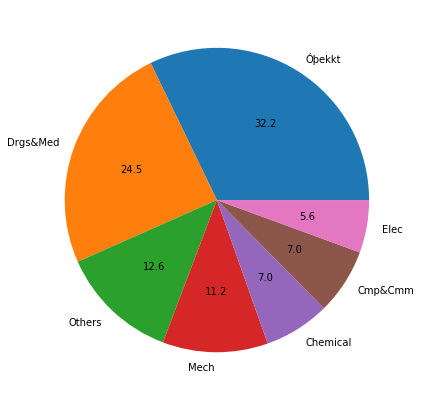

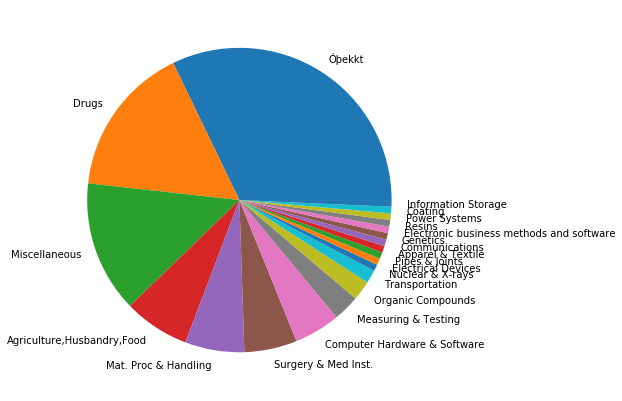

In [45]:

pie_data = nber_df.nber_category_title.value_counts()

plt.figure(figsize=(7,7))
plt.pie(pie_data,labels=pie_data.index,autopct='%1.1f')
plt.savefig('category_pie.png')
plt.show()

pie_data = nber_df.nber_subcategory_title.value_counts()

plt.figure(figsize=(12,7))
plt.pie(pie_data,labels=pie_data.index)
plt.savefig('sub_category_pie.png')
plt.show()

In [46]:
loc_df.to_csv('../../Data/assignee_list_PatentView.csv')

In [47]:
def is_ascii(s):
    if type(s) == type(1.0):
        print(s)
        return False
    return all(ord(c) < 128 for c in s)

In [48]:
[print(x) for x in loc_df.assignee_organization.values if not is_ascii(x)]

Össur hf
Ãƒâ€“ssur hf
HÃƒÂ¡skÃƒÂ³linn ÃƒÂ­ Reykjavik
Össur Iceland ehf
HÃƒÂ¡skÃƒÂ³li ÃƒÂslands
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


[None, None, None, None, None, None, None, None, None, None, None, None]

In [49]:
nber_df.nber_category_title.value_counts(dropna=False)

Óþekkt      46
Drgs&Med    35
Others      18
Mech        16
Chemical    10
Cmp&Cmm     10
Elec         8
Name: nber_category_title, dtype: int64

In [51]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic3ZlcnJpcmgiLCJhIjoiY2swd2lqN29vMDRlcjNjbmIyczFrOWUxZSJ9.FUnpJVL57I1tQG6zdBXnJw")
carshare = px.data.carshare()
fig = px.scatter_mapbox(loc_df, lat="location_latitude", lon="location_longitude", 
                        color="assignee_total_num_inventors", 
                        size="assignee_total_num_patents", text="assignee_organization",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=20, zoom=10)
fig.show()

In [ ]:
# Sjáum að mjög mörg fyrirtæki eru bara með locationið sitt skráð á "reykjavík" og staðsetningin er í miðbænum
print(loc_df.x_loc.value_counts())
print(loc_df.y_loc.value_counts())

In [ ]:
# Gerðir assignees
print(loc_df.assignee_type.value_counts())
# Virðist vera að patent séu type 5 þegar það er skráð á einstakling en ekki fyrirtæki
loc_df[loc_df.assignee_type == '5']


In [ ]:
loc_df.to_csv('../../Data/')

In [ ]:
loc_df